In [1]:
import qsweepy.save_pkl
import pandas as pd
import matplotlib.pyplot as plt
import qsweepy.fitting as fitting
import numpy as np
%matplotlib notebook


In [2]:
from qsweepy import *
from qsweepy.ponyfiles import *

Failed loading module Keysight_M3102A:  No module named 'keysightSD1'
Failed loading module Keysight_M3202A:  No module named 'keysightSD1'
[WinError 126] The specified module could not be found
Failed loading module Signal_Hound_SA:  name 'signal_hound_dll' is not defined


In [3]:
from qsweepy.ponyfiles.data_structures import *

In [91]:
sample_name = '11qubits_021119'
db = database.MyDatabase()

sweeper = sweep_extras.Sweeper(db, sample_name=sample_name)
exdir_db_inst = exdir_db.Exdir_db(db=db, sample_name=sample_name)

In [5]:
qubits = {
          '1': {'r':{
                    'Fr': 6.260e9, # first sample # second sample 7.0848e9,# second sample 7.085e9,#6.59783e9,
                    'Fr_min': 6.258e9,#6.575e9,
                    'Fr_max': 6.262e9,#7.100e9# down 6.702e9,#7.110e9,##6.62e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                     {'F01_min': 3.405e9,
                      'min_voltage':-3.7,
                      'max_voltage':0.8,
                     'F01_max': 4.0787e9}, # 4.17799e9#4.1173e9 #4.242e9#4.23819e9#4.159e9},#4.535e9}, #4.622e9 - up},#5.505e9}, # was 5.508e9,last 5.51812
                     'P':
                     {'nndac_coil_id':20,#0,
                      'max_voltage':4,
                      'awg_tek_coil_channel':4,
                      'coil_device_channel':4,
                     'P':None,    
                     }
                    }},
          '2': {'r':{
                    'Fr': 6.307e9,#7.4095e9,#7.41e9, #7.413e9,# first sample # second sample 7.8816e9,#'Fr': 6.7335e9,
                    'Fr_min': 6.305e9,#7.395e9,#6.72e9,
                    'Fr_max': 6.309e9,#7.415e9,#down  8.32e9,#8.84e9,##6.788e9,#6.884e9,#6.92e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                    {'F01_min':3.330e9,
                     'min_voltage':-3.6,
                      'max_voltage':0.8,
                    'F01_max':3.880e9},#5.8e9#5.010e9 - up},#{'F01_min':5.519e9},#5.52025
                    'P':
                     {
                     'nndac_coil_id':18,#2,!!!!!!!!
                         'max_voltage':4,
                     'awg_tek_coil_channel':4,
                     'coil_device_channel':4,
                     'P':None, 
                     }}},
        '3': {'r':{
                    'Fr': 6.3623e+09, # first sample # second sample 7.0848e9,# second sample 7.085e9,#6.59783e9,
                    'Fr_min': 6.36e+09,#6.575e9,
                    'Fr_max': 6.364e+09,#7.100e9# down 6.702e9,#7.110e9,##6.62e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                     {'F01_min': 3.362e9,
                      'min_voltage':-3.6,
                      'max_voltage':0.9,
                     'F01_max': 4.054e9}, # 4.17799e9#4.1173e9 #4.242e9#4.23819e9#4.159e9},#4.535e9}, #4.622e9 - up},#5.505e9}, # was 5.508e9,last 5.51812
                     'P':
                     {'nndac_coil_id':16,#0,
                      'max_voltage':4,
                      'awg_tek_coil_channel':4,
                      'coil_device_channel':4,
                     'P':None,    
                     }}
                },
          '4': {'r':{
                    'Fr': 6.414e+09, # first sample # second sample 7.373e9,# second sample 7.376e9,#6.8791e9,
                    'Fr_min': 6.412e+09,#6.734e9,#6.879e9,#6.82e9,
                    'Fr_max': 6.416e+09,# down 6.850e9,#7.304e9, ##6.76e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                    {'F01_min': 3.328e9,
                     'min_voltage':-3.6,
                      'max_voltage':0.8,
                    'F01_max': 3.88e9}, # not sure
                    'P':
                     {
                    'nndac_coil_id':13,#4,!!!!!!
                         'max_voltage':4,
                    'awg_tek_coil_channel':3,
                    'coil_device_channel':3,
                     'P':None, 
                     }
                }},
          '5': {'r':{
                    'Fr': 6.4587e9, # first sample # second sample 7.373e9,# second sample 7.376e9,#6.8791e9,
                    'Fr_min': 6.4567e+09,#6.734e9,#6.879e9,#6.82e9,
                    'Fr_max': 6.4607e+09,# down 6.850e9,#7.304e9, ##6.76e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                    {'F01_min': 3.278e9,
                      'min_voltage':-3.6,
                      'max_voltage':0.9,
                     'F01_max': 4.1e9}, 
                    'P':
                     {
                    'nndac_coil_id':12,#4,
                         'max_voltage':4,
                     'P':None, 
                     }
                }},
          '6': {'r':{
                    'Fr': 6.4984e+09, # first sample # second sample 7.373e9,# second sample 7.376e9,#6.8791e9,
                    'Fr_min': 6.4964e+09,#6.734e9,#6.879e9,#6.82e9,
                    'Fr_max': 6.5004e+09,# down 6.850e9,#7.304e9, ##6.76e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                    {'F01_min': 3.286e9,
                      'min_voltage':-3.6,
                      'max_voltage':0.9,
                    'F01_max': 3.806e9}, #4.1923e9# 4.17799e9 #4.467e9#4.464e9#4.203e9},#4.675e9},#4.484e9 -up},#{'F01_min':5.45525e9},#5.45678
                    'P':
                     {
                    'nndac_coil_id':10,#4, !!!!!!!!
                         'max_voltage':4,
                    'awg_tek_coil_channel':3,
                    'coil_device_channel':3,
                     'P':None, 
                     }
                }},
          '7': {'r':{
                    'Fr': 6.555e+09, #8.528e9 first sample # second sample 7.373e9,# second sample 7.376e9,#6.8791e9,
                    'Fr_min': 6.553e+09,#6.734e9,#6.879e9,#6.82e9,
                    'Fr_max': 6.557e+09,# down 6.850e9,#7.304e9, ##6.76e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                    {'F01_min': 3.374e9,
                      'min_voltage':-4,
                      'max_voltage':0.9,
                    'F01_max': 4.1e9}, #4.1923e9# 4.17799e9 #4.467e9#4.464e9#4.203e9},#4.675e9},#4.484e9 -up},#{'F01_min':5.45525e9},#5.45678
                    'P':
                     {
                    'nndac_coil_id':8,#4,
                         'max_voltage':4,
                    'awg_tek_coil_channel':3,
                    'coil_device_channel':3,
                     'P':None, 
                     }
                }},
          '8': {'r':{
                    'Fr': 6.606e+09, # first sample # second sample 7.0848e9,# second sample 7.085e9,#6.59783e9,
                    'Fr_min': 6.604e+09,#6.575e9,
                    'Fr_max': 6.608e+09,#7.100e9# down 6.702e9,#7.110e9,##6.62e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                     {'F01_min': 3.366e9,
                       'min_voltage':-3,
                      'max_voltage':0.9,
                    'F01_max': 3.914e9}, # 4.17799e9#4.1173e9 #4.242e9#4.23819e9#4.159e9},#4.535e9}, #4.622e9 - up},#5.505e9}, # was 5.508e9,last 5.51812
                     'P':
                     {'nndac_coil_id':6,#0,
                      'max_voltage':3,
                      'awg_tek_coil_channel':4,
                      'coil_device_channel':4,
                     'P':None,    
                     }
                    }},
          '9': {'r':{
                    'Fr': 6.658e+09, # first sample # second sample 7.0848e9,# second sample 7.085e9,#6.59783e9,
                    'Fr_min': 6.656e+09,#6.575e9,
                    'Fr_max': 6.660e+09,#7.100e9# down 6.702e9,#7.110e9,##6.62e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                     {'F01_min': 3.348e9,
                       'min_voltage':-3.6,
                      'max_voltage':0.9,
                    'F01_max': 4.056e9}, # 4.17799e9#4.1173e9 #4.242e9#4.23819e9#4.159e9},#4.535e9}, #4.622e9 - up},#5.505e9}, # was 5.508e9,last 5.51812
                     'P':
                     {'nndac_coil_id':4,#0,
                      'max_voltage':4,
                      'awg_tek_coil_channel':4,
                      'coil_device_channel':4,
                     'P':None,    
                     }
                    }},
          '10': {'r':{
                    'Fr': 6.711e+09, # first sample # second sample 7.0848e9,# second sample 7.085e9,#6.59783e9,
                    'Fr_min': 6.709e+09,#6.575e9,
                    'Fr_max': 6.713e+09,#7.100e9# down 6.702e9,#7.110e9,##6.62e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                     {'F01_min': 3.266e9,
                       'min_voltage':-3.6,
                      'max_voltage':0.9,
                    'F01_max': 3.882e9}, # 4.17799e9#4.1173e9 #4.242e9#4.23819e9#4.159e9},#4.535e9}, #4.622e9 - up},#5.505e9}, # was 5.508e9,last 5.51812
                     'P':
                     {'nndac_coil_id':2,#0,
                      'max_voltage':4,
                      'awg_tek_coil_channel':4,
                      'coil_device_channel':4,
                     'P':None,    
                     }
                    }},
          '11': {'r':{
                    'Fr': 6.763e+09, # first sample # second sample 7.0848e9,# second sample 7.085e9,#6.59783e9,
                    'Fr_min': 6.761e+09,#6.575e9,
                    'Fr_max': 6.765e+09,#7.100e9# down 6.702e9,#7.110e9,##6.62e9,
                     'dFr': 0.1e6,#0.1e6, # tolerance of resonator frequency
                     'P': -45 },
                'q':{
                    "F":
                     {'F01_min': 3.720e9,
                       'min_voltage':-1.5,
                      'max_voltage':0.7,
                      'F01_max': 3.976e9}, # 4.17799e9#4.1173e9 #4.242e9#4.23819e9#4.159e9},#4.535e9}, #4.622e9 - up},#5.505e9}, # was 5.508e9,last 5.51812
                     'P':
                     {'nndac_coil_id':0,#0,
                      'max_voltage':1.5,
                      'awg_tek_coil_channel':4,
                      'coil_device_channel':4,
                     'P':None,    
                     }
                    }},
          
                }


 

qubit_id = '1'
#qubits = {qubit_id: qubit for qubit_id, qubit in qubits.items() if qubit_id == '2'}
qubits = {qubit_id: qubit for qubit_id, qubit in qubits.items()}

In [6]:
qubit1={'up':4598,'down':4600}
qubit2={'up':4618,'down':4617}
qubit3={'up':4620,'down':4619}
qubit4={'up':4622,'down':4621}
qubit5={'up':4624,'down':4623}
qubit6={'up':4626,'down':4625}

qubit7={'up':4637,'down':4636}

qubit8={'up':4630,'down':4629}
qubit9={'up':4632,'down':4631}

qubit10={'up':4639,'down':4638}
qubit11={'up':4576,'down':4576}

# Fiting

In [212]:
fr  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0, L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5+(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*frb*fqb(x, EJ1, EJ2, EC, phi0, L))**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))
fqb = lambda x, EJ1, EJ2, EC, phi0, L: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(np.pi*x*L+phi0*np.pi)**2+(EJ1+EJ2)**2*np.cos(np.pi*x*L+phi0*np.pi)**2)**0.25
def find_min(data,Y):
    arg=[np.argmin(data[i]) for i in range(len(data))]
    return Y[arg]
def one_tone_plot(x,y,z,fit=None):
    plt.figure()
    step=np.abs(x[1]-x[0])/2
    for _id in range(len(x)):
        x_plot1 = (x[_id]-step)
        x_plot2 = (x[_id]+step)
        plt.pcolormesh([x_plot1, x_plot2],y,np.abs(z[_id].T).reshape(len(y),1),cmap='RdBu')
    if fit is not None:
        plt.plot(x,fit,'go')
        plt.plot(x,fit,'g')
def one_tone_fit_points(x,fit_params):
    frb, g, EJ1, EJ2, EC, phi0,L= fit_params
    return fr(x,frb, g, EJ1, EJ2, EC, phi0, L)

In [10]:
P0_podgon_onetone=[]
P0_podgon_onetone.append([ 6.26000000e+09 , 0.8e-2,  2.04086892e+10 , 3.58060430e+09,
  160e6 , 8.22169602e-02 ,-1.10745709e-01])
P0_podgon_onetone.append([ 6.30878640e+09 , 0.8e-2 , 1.98308991e+10,  3.20889443e+09,
  160e6 , 8.44831600e-02, -1.13388195e-01])
P0_podgon_onetone.append([ 6.3623e+09 , 0.8e-2,  2.04086892e+10 , 3.58060430e+09,
  160e6 , 8.22169602e-02 ,-1.10745709e-01])
P0_podgon_onetone.append([ 6.41257729e+09 , 0.8e-2 , 2.01109883e+10, 3.40089803e+09,
  160e6 , 8.64696360e-02, -1.13173875e-01])
P0_podgon_onetone.append([ 6.45870000e+09 ,0.8e-2,  1.96576181e+10,  3.47025789e+09,
  160e6 , 8.79028568e-02, -1.14572312e-01])
P0_podgon_onetone.append([ 6.49840000e+09 , 0.8e-2 , 1.95580647e+10 , 3.13139052e+09,
  160e6 , 8.51922623e-02, -1.12260792e-01])
P0_podgon_onetone.append([ 6.55513934e+09,  0.8e-2 , 2.00797455e+10 , 3.61077597e+09,
  160e6 , 8.12802670e-02, -1.04832111e-01])
P0_podgon_onetone.append([ 6.59746532e+09 , 0.8e-2 , 1.98918098e+10 , 3.41137117e+09,
  160e6 , 8.06930318e-02 ,-1.14222294e-01])
P0_podgon_onetone.append([ 6.64813109e+09 , 0.8e-2 , 1.97393599e+10 , 3.63220203e+09,
  160e6 , 7.75346556e-02 ,-1.11135121e-01])
P0_podgon_onetone.append([ 6.70352279e+09 , 0.8e-2 , 1.96389134e+10 , 3.53714686e+09,
  160e6 , 7.03222854e-02 ,-1.07667672e-01])
P0_podgon_onetone.append([ 6.75304036e+09 ,0.8e-2 , 2.16525041e+10 , 3.18878896e+09,
  160e6,  8.12703811e-02, -1.15567891e-01])

In [216]:
from scipy.optimize import least_squares
fitresults_vec=[]
for i, qubit_id  in enumerate(qubits.keys()):
    data=np.asarray(find_min(np.abs(one_tone_data_z[i]),one_tone_data_y[i]))
    current_points=one_tone_data_x[i] 
    P0=P0_podgon_onetone[i]
    initial_guess = {'L':P0[6],
                     'phi0':P0[5],
                     'frb':P0[0],
                     'EC':P0[4],
                     'EJ1':P0[2],
                     'EJ2':P0[3],
                     'Cc':P0[1]}
    
    def residualsQ(p):
        frb, g, EJ1, EJ2, EC, phi0 = p[:6]
        L = p[-1]
        res = []
        for coil_id in range(len(data)):
            res.extend([(fr(x[coil_id], frb, g, EJ1, EJ2, EC, phi0, L)/1e9-(data[coil_id])/1e9)*2])
        return res
        
    p0 = (initial_guess['frb'], 
          initial_guess['Cc'], 
          initial_guess['EJ1'], 
          initial_guess['EJ2'], 
          initial_guess['EC'], 
          initial_guess['phi0'],
          initial_guess['L'])
          

    bounds = ((p0[0]-20e6,      p0[1]*0.5,\
               p0[2]*0.8,      p0[3]*0.8,\
               p0[4]*0.8, p0[5]*0.8,\
               p0[6]*1.2),
              
              (p0[0]+20e6, p0[1]*1.5,\
               p0[2]*1.2, p0[3]*1.2,\
               p0[4]*1.2,  p0[5]*1.3,\
               p0[6]*0.9))
    
    fitresults = least_squares(residualsQ, p0, x_scale=np.abs(p0), bounds=bounds)
    
    fitresults_vec.append(fitresults)
    L_fit=fitresults.x[:]
    print(L_fit)

[ 6.25901878e+09  6.94117788e-03  1.93323679e+10  2.87781901e+09
  1.42430927e+08  7.13653581e-02 -1.00553269e-01]
[ 6.30585360e+09  7.83190737e-03  1.72992958e+10  2.72590907e+09
  1.37609005e+08  8.28531899e-02 -1.09405896e-01]
[ 6.36100768e+09  9.68605722e-03  1.63374403e+10  2.86523686e+09
  1.28147606e+08  9.16694802e-02 -1.14674117e-01]
[ 6.41276162e+09  9.53428117e-03  1.60889663e+10  2.72084452e+09
  1.28432071e+08  8.43230060e-02 -1.10713001e-01]
[ 6.45768950e+09  9.06766175e-03  1.57291318e+10  2.77631718e+09
  1.28001866e+08  8.45934648e-02 -1.17098256e-01]
[ 6.49761276e+09  6.49733246e-03  1.61158998e+10  3.75765589e+09
  1.46070957e+08  8.04362899e-02 -1.07726641e-01]
[ 6.55383066e+09  9.81243638e-03  1.61874052e+10  2.88865027e+09
  1.28000486e+08  7.74621041e-02 -1.02589453e-01]
[ 6.60516201e+09  9.57465632e-03  1.59134790e+10  2.72916922e+09
  1.28000528e+08  8.75169807e-02 -1.02800065e-01]
[ 6.65693917e+09  9.07512792e-03  1.77848943e+10  2.90860190e+09
  1.32151897e+0

In [217]:
# for all one tones
for i in range(11):
    one_tone_plot(one_tone_data_x[i],one_tone_data_y[i],
                 one_tone_data_z[i],one_tone_fit_points(one_tone_data_x[i],fitresults_vec[i].x))

### save in database

In [ ]:
parameters = [
    MeasurementParameter(name='qubit_id', setter=None, values=[i for i in range(11)]),
]
data = fitresults_vec
dataset = MeasurementDataset(parameters=parameters, data=data)
data = MeasurementState(datasets={'data_fit':dataset}, measurement_type='one_tone_fit', sample_name=sample_name)

# exdir_db_inst.save_measurement(data)

## fit qubits

In [7]:
P0_podgon=[]
P0_podgon.append([ 6.26000000e+09 , 5.75648278e-11,  2.04086892e+10 , 3.58060430e+09,
  8.61301751e+07 , 8.22169602e-02 ,-1.10745709e-01])
P0_podgon.append([ 6.30878640e+09 , 4.31268856e-19 , 1.98308991e+10,  3.20889443e+09,
  8.33298939e+07 , 8.44831600e-02, -1.13388195e-01])
P0_podgon.append([ 6.3623e+09 , 5.75648278e-11,  2.04086892e+10 , 3.58060430e+09,
  8.61301751e+07 , 8.22169602e-02 ,-1.10745709e-01])
P0_podgon.append([ 6.41257729e+09 , 1.12724259e-19 , 2.01109883e+10, 3.40089803e+09,
  8.28268101e+07 , 8.64696360e-02, -1.13173875e-01])
P0_podgon.append([ 6.45870000e+09 , 1.62189135e-22,  1.96576181e+10,  3.47025789e+09,
  8.29187611e+07 , 8.79028568e-02, -1.14572312e-01])
P0_podgon.append([ 6.49840000e+09 , 5.39803282e-30 , 1.95580647e+10 , 3.13139052e+09,
  8.21458156e+07 , 8.51922623e-02, -1.12260792e-01])
P0_podgon.append([ 6.55513934e+09,  5.86567097e-19 , 2.00797455e+10 , 3.61077597e+09,
  8.66113673e+07 , 8.12802670e-02, -1.04832111e-01])
P0_podgon.append([ 6.59746532e+09 , 1.10388734e-27 , 1.98918098e+10 , 3.41137117e+09,
  8.38459605e+07 , 8.06930318e-02 ,-1.14222294e-01])
P0_podgon.append([ 6.64813109e+09 , 9.72855216e-31 , 1.97393599e+10 , 3.63220203e+09,
  8.70332630e+07 , 7.75346556e-02 ,-1.11135121e-01])
P0_podgon.append([ 6.70352279e+09 , 1.17222256e-30 , 1.96389134e+10 , 3.53714686e+09,
  8.34268160e+07 , 7.03222854e-02 ,-1.07667672e-01])
P0_podgon.append([ 6.75304036e+09 , 2.72787378e-30 , 2.16525041e+10 , 3.18878896e+09,
  7.93986404e+07,  8.12703811e-02, -1.15567891e-01])

In [7]:
def two_tone_adaptive_plot(x,y,z,fit_params,fit=None):
#     plt.figure()
    fr_diag=fq_coil(fit_params,x)
    step=np.abs(x[1]-x[0])/2
    for _id in range(len(x)):
        x_plot1 = (x[_id]-step)
        x_plot2 = (x[_id]+step)
        plt.pcolormesh([x_plot1, x_plot2], y/1e3+fr_diag[_id],z[_id].reshape(len(y),1))
    if fit is not None:
        plt.plot(x,fit,'go')
#         plt.plot(x,fit,'g')
def data_abs(meas):
    for i in range(len(meas)):
        meas[i]=meas[i]-np.median(np.real(meas[i]))-1j*np.median(np.imag(meas[i]))
    return meas
def two_tone1_fit_points(x,fit_params):
    frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, L= fit_params
    return fq_q1(x,frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL,L)
def two_tone2_fit_points(x,fit_params):
    frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L= fit_params
    return fq_q2(x,frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L)
def fq_coil(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 = p[:6]
    L = p[-1]
    return fq_r(x, frb, Cc, EJ1, EJ2, EC, phi0, L)/1e9
def find_freqs_abs(data,Y):
    arg=[np.argmax((np.abs(data.T)-np.mean(np.abs(data.T)))[:,i]) for i in range(len(data))]
    return Y[arg]
def find_freqs_min(data,Y):
    arg=[np.argmin(data[i]) for i in range(len(data))]
#     print(arg)
    return Y[arg]
def fq_coil_qubit1(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL= p[:8]
    L = p[-1]
    return fq_q1(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL,L)/1e9
def fq_coil_qubit2(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL,fqR, CcR,= p[:10]
    L = p[-1]
    return fq_q2(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL,fqR, CcR,L)/1e9
fq_q2  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L: (fq_q1(x, frb, Cc,EJ1, EJ2, EC, phi0,fqL, CcL, L)+fqR)*0.5-(((fq_q1(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL, L)-fqR)*0.5)**2+CcR**2*fq_q1(x, frb,Cc, EJ1, EJ2, EC, phi0, fqL, CcL, L)*fqR)**0.5*np.sign(fqR-fq_q1(x, frb, Cc,EJ1, EJ2, EC, phi0, fqL, CcL, L))
fq_q1  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, L: (fq_r(x, frb, Cc,EJ1, EJ2, EC, phi0, L)+fqL)*0.5-(((fq_r(x, frb, Cc, EJ1, EJ2, EC, phi0, L)-fqL)*0.5)**2+CcL**2*fq_r(x, frb,Cc, EJ1, EJ2, EC, phi0, L)*fqL)**0.5*np.sign(fqL-fq_r(x, frb, Cc,EJ1, EJ2, EC, phi0, L))
fq_r  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))
fqb = lambda x, EJ1, EJ2, EC, phi0, L: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(np.pi*x*L+phi0*np.pi)**2+(EJ1+EJ2)**2*np.cos(np.pi*x*L+phi0*np.pi)**2)**0.25


# Fit anticrossing main resonator 14 qubit

In [ ]:

def data_abs(meas):
    for i in range(len(meas)):
        meas[i]=meas[i]-np.median(np.real(meas[i]))-1j*np.median(np.imag(meas[i]))
    return meas
def two_tone1_fit_points(x,fit_params):
    frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, L= fit_params
    return fq_q1(x,frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL,L)
def two_tone2_fit_points(x,fit_params):
    frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L= fit_params
    return fq_q2(x,frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L)
def fq_coil(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 = p[:6]
    L = p[-1]
    return fq_r(x, frb, Cc, EJ1, EJ2, EC, phi0, L)/1e9
def find_freqs_abs(data,Y):
    arg=[np.argmax((np.abs(data.T)-np.mean(np.abs(data.T)))[:,i]) for i in range(len(data))]
    return Y[arg]
def find_freqs_min(data,Y):
    arg=[np.argmin(data[i]) for i in range(len(data))]
#     print(arg)
    return Y[arg]
def fq_coil_qubit1(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL= p[:8]
    L = p[-1]
    return fq_q1(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL,L)/1e9
def fq_coil_qubit2(p,x):
    frb, Cc, EJ1, EJ2, EC, phi0 ,fqL, CcL,fqR, CcR,= p[:10]
    L = p[-1]
    return fq_q2(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL,fqR, CcR,L)/1e9
fq_q2  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, L: (fq_q1(x, frb, Cc,EJ1, EJ2, EC, phi0,fqL, CcL, L)+fqR)*0.5-(((fq_q1(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL, L)-fqR)*0.5)**2+CcR**2*fq_q1(x, frb,Cc, EJ1, EJ2, EC, phi0, fqL, CcL, L)*fqR)**0.5*np.sign(fqR-fq_q1(x, frb, Cc,EJ1, EJ2, EC, phi0, fqL, CcL, L))
fq_q1  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, L: (fq_r(x, frb, Cc,EJ1, EJ2, EC, phi0, L)+fqL)*0.5-(((fq_r(x, frb, Cc, EJ1, EJ2, EC, phi0, L)-fqL)*0.5)**2+CcL**2*fq_r(x, frb,Cc, EJ1, EJ2, EC, phi0, L)*fqL)**0.5*np.sign(fqL-fq_r(x, frb, Cc,EJ1, EJ2, EC, phi0, L))
fq_r  = lambda x, frb, Cc, EJ1, EJ2, EC, phi0,L: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))
fqb = lambda x, EJ1, EJ2, EC, phi0, L: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(np.pi*x*L+phi0*np.pi)**2+(EJ1+EJ2)**2*np.cos(np.pi*x*L+phi0*np.pi)**2)**0.25


In [ ]:
flux=lambda xVec,LVec,phi0: np.pi*np.sum(xVec*LVec)+np.pi*phi0

Fq_q2  = lambda xVec, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, fqR, CcR, LVec: (Fq_q1(x, frb, Cc,EJ1, EJ2, EC, phi0,fqL, CcL, L)+fqR)*0.5-(((Fq_q1(x, frb, Cc, EJ1, EJ2, EC, phi0, fqL, CcL, L)-fqR)*0.5)**2+CcR**2*Fq_q1(x, frb,Cc, EJ1, EJ2, EC, phi0, fqL, CcL, L)*fqR)**0.5*np.sign(fqR-Fq_q1(x, frb, Cc,EJ1, EJ2, EC, phi0, fqL, CcL, L))
Fq_q1  = lambda xVec, frb, Cc, EJ1, EJ2, EC, phi0,fqL, CcL, LVec: (fq_r(x, frb, Cc,EJ1, EJ2, EC, phi0, L)+fqL)*0.5-(((fq_r(x, frb, Cc, EJ1, EJ2, EC, phi0, L)-fqL)*0.5)**2+CcL**2*fq_r(x, frb,Cc, EJ1, EJ2, EC, phi0, L)*fqL)**0.5*np.sign(fqL-Fq_r(x, frb, Cc,EJ1, EJ2, EC, phi0, L))
Fq_r  = lambda xVec, frb, Cc, EJ1, EJ2, EC, phi0,LVec: (fqb(x, EJ1, EJ2, EC, phi0, L)+frb)*0.5-(((fqb(x, EJ1, EJ2, EC, phi0, L)-frb)*0.5)**2+Cc**2*fqb(x, EJ1, EJ2, EC, phi0, L)*frb)**0.5*np.sign(frb-fqb(x, EJ1, EJ2, EC, phi0, L))
Fqb = lambda xVec, EJ1, EJ2, EC, phi0, LVec: (8*EC)**0.5*((EJ1-EJ2)**2*np.sin(flux(xVec,LVec,phi0))**2+(EJ1+EJ2)**2*np.cos(flux(xVec,LVec,phi0))**2)**0.25 - EC


In [7]:
P0_podgon_onetone=[]
P0_podgon_onetone.append([ 6.26000000e+09 , 0.8e-2,  2.04086892e+10 , 3.58060430e+09,
  160e6 , 8.22169602e-02 ,-1.10745709e-01])
P0_podgon_onetone.append([ 6.30878640e+09 , 0.8e-2 , 1.98308991e+10,  3.20889443e+09,
  160e6 , 8.44831600e-02, -1.13388195e-01])
P0_podgon_onetone.append([ 6.3623e+09 , 0.8e-2,  2.04086892e+10 , 3.58060430e+09,
  160e6 , 8.22169602e-02 ,-1.10745709e-01])
P0_podgon_onetone.append([ 6.41257729e+09 , 0.8e-2 , 2.01109883e+10, 3.40089803e+09,
  160e6 , 8.64696360e-02, -1.13173875e-01])
P0_podgon_onetone.append([ 6.45870000e+09 ,0.8e-2,  1.96576181e+10,  3.47025789e+09,
  160e6 , 8.79028568e-02, -1.14572312e-01])
P0_podgon_onetone.append([ 6.49840000e+09 , 0.8e-2 , 1.95580647e+10 , 3.13139052e+09,
  160e6 , 8.51922623e-02, -1.12260792e-01])
P0_podgon_onetone.append([ 6.55513934e+09,  0.8e-2 , 2.00797455e+10 , 3.61077597e+09,
  160e6 , 8.12802670e-02, -1.04832111e-01])
P0_podgon_onetone.append([ 6.59746532e+09 , 0.8e-2 , 1.98918098e+10 , 3.41137117e+09,
  160e6 , 8.06930318e-02 ,-1.14222294e-01])
P0_podgon_onetone.append([ 6.64813109e+09 , 0.8e-2 , 1.97393599e+10 , 3.63220203e+09,
  160e6 , 7.75346556e-02 ,-1.11135121e-01])
P0_podgon_onetone.append([ 6.70352279e+09 , 0.8e-2 , 1.96389134e+10 , 3.53714686e+09,
  160e6 , 7.03222854e-02 ,-1.07667672e-01])
P0_podgon_onetone.append([ 6.75304036e+09 ,0.8e-2 , 2.16525041e+10 , 3.18878896e+09,
  160e6,  8.12703811e-02, -1.15567891e-01])

In [8]:
P0_podgon=[]
P0_podgon.append([ 6.26000000e+09 , 5.75648278e-11,  2.04086892e+10 , 3.58060430e+09,
  8.61301751e+07 , 8.22169602e-02 ,-1.10745709e-01])
P0_podgon.append([ 6.30878640e+09 , 4.31268856e-19 , 1.98308991e+10,  3.20889443e+09,
  8.33298939e+07 , 8.44831600e-02, -1.13388195e-01])
P0_podgon.append([ 6.3623e+09 , 5.75648278e-11,  2.04086892e+10 , 3.58060430e+09,
  8.61301751e+07 , 8.22169602e-02 ,-1.10745709e-01])
P0_podgon.append([ 6.41257729e+09 , 1.12724259e-19 , 2.01109883e+10, 3.40089803e+09,
  8.28268101e+07 , 8.64696360e-02, -1.13173875e-01])
P0_podgon.append([ 6.45870000e+09 , 1.62189135e-22,  1.96576181e+10,  3.47025789e+09,
  8.29187611e+07 , 8.79028568e-02, -1.14572312e-01])
P0_podgon.append([ 6.49840000e+09 , 5.39803282e-30 , 1.95580647e+10 , 3.13139052e+09,
  8.21458156e+07 , 8.51922623e-02, -1.12260792e-01])
P0_podgon.append([ 6.55513934e+09,  5.86567097e-19 , 2.00797455e+10 , 3.61077597e+09,
  8.66113673e+07 , 8.12802670e-02, -1.04832111e-01])
P0_podgon.append([ 6.59746532e+09 , 1.10388734e-27 , 1.98918098e+10 , 3.41137117e+09,
  8.38459605e+07 , 8.06930318e-02 ,-1.14222294e-01])
P0_podgon.append([ 6.64813109e+09 , 9.72855216e-31 , 1.97393599e+10 , 3.63220203e+09,
  8.70332630e+07 , 7.75346556e-02 ,-1.11135121e-01])
P0_podgon.append([ 6.70352279e+09 , 1.17222256e-30 , 1.96389134e+10 , 3.53714686e+09,
  8.34268160e+07 , 7.03222854e-02 ,-1.07667672e-01])
P0_podgon.append([ 6.75304036e+09 , 2.72787378e-30 , 2.16525041e+10 , 3.18878896e+09,
  7.93986404e+07,  8.12703811e-02, -1.15567891e-01])

In [1012]:
P0_podgon_twotone=[]
P0_podgon_twotone.append([ 6.2580e+09 , 0.8e-2, 1.126172185e+10 , 1.968976245e+09,
 15.6e7  ,7.96063944e-02 , 3.73827488e+09 , 1.4e-02,
 -1.11824314e-01])
P0_podgon_twotone.append([ 6.30402755e+09, 1.00433465e-01,  1.10791479e+10,  1.81756150e+09,
  1.56453522e8 , 8.68666687e-02,  3.49202273e+09,  1.33511318e-02,
  3.81e+09,  3.67075470e-03 ,-1.12179379e-01])

P0_podgon_twotone.append([ 6.36225166e+09,  8.01428025e-03,  11.1737426e+9  ,1.97694132e+09,
  1.54664926e8,  8.27517576e-02 , 3.745e+09,  1.55816528e-02,
  3.39515926e+09,  5.5e-03, -1.12493371e-01])

P0_podgon_twotone.append([ 6.40841572e+09,  8.22852090e-03 , 10.9700248e+9,  1.81105101e+09,
  1.52069379e8,  8.44714542e-02,  3.69504818e+09,  4.23426909e-03,
  3.43573031e+09,  1.43409101e-02, -1.13008285e-01])

P0_podgon_twotone.append([ 6.45635702e+09,  8.18269462e-03 , 1.06976578e+10,  1.87684245e+09,
  1.52115447e8, 8.60741805e-02,  3.69186235e+09,  1.37770096e-02,
  3.37736765e9, 4.21426273e-03, -1.11034501e-01])
P0_podgon_twotone.append([ 6.51131535e+09 , 7.13322583e-03 , 1.06039210e+10,  1.72205231e+09,
  1.50883075e8,  9.18759921e-02 , 3.4027e+09,  0.0137656319,
  3.830400000e+09,  2.10714367e-03, -0.10783])
P0_podgon_twotone.append([ 6.55548153e+09 , 7.97470585e-03 , 10.819975200e9 , 1.916046630e+09,
  1.60569224e8,  7.58569734e-02 , 3.74186235e+09 , 1.41637373e-02,
  3.26594545e+09,  4.19698619e-03 ,-0.10364])
P0_podgon_twotone.append([ 6.59770969e+09,  7.98155806e-03,  10.6525791e+9,  1.90081752e+09,
  1.56086696e8 , 8.15266705e-02 , 3.472328770e+09,  1.27624657e-02,
  3.83477214e+09 , 2.20179632e-03, -1.1033062e-01])

#bad, for that plot imag instead of abs
P0_podgon_twotone.append([ 6.64811198e+09 , 8.25895819e-03 , 1.07552449e+10,  1.97619114e+09,
  1.59670032e+08 , 7.57868298e-02 , 3.71588208e+09 , 1.31150042e-02,
  3.37385562e+09 , 2.86013948e-03 ,-1.10384262e-01])


P0_podgon_twotone.append([ 6.70352279e+09 , 0.8e-2 , 10909921000.00,  1955052310.00,
  150e6 , 7.03222854e-02 ,3.442328770e+09,   1.37624657e-02,
  3.809e+09 , 4.20179632e-03,
                          -1.07667672e-01])
P0_podgon_twotone.append([ 6.75304036e+09 ,0.8e-2 ,1.06039210e+10 , 1.72205231e+09,
  150e6,  8.12703811e-02, 3.685e+09,  4.20179632e-03 ,
                          -1.15567891e-01])

In [1085]:

def Flux_qubit(x, coil_id, phi0, LVec, Vvec):
    Vvec[coil_id]=0
    L=LVec[coil_id]
    Phi=np.pi*phi0 +np.pi*np.sum(LVec*Vvec)+np.pi*L*x
    return Phi

def Two_osc(f1, f2, C):
    Frequency1=(f1+f2)*0.5-(((f1-f2)*0.5)**2+C**2*f1*f2)**0.5*np.sign(f2-f1)
    Frequency2=(f1+f2)*0.5+(((f1-f2)*0.5)**2+C**2*f1*f2)**0.5*np.sign(f2-f1)
    return Frequency1,Frequency2
   
def Qubit_F(x, coil_id, EJ1, EJ2, EC, phi0, L=False, LVec=np.zeros((11,)), V0vec=np.zeros((11,))):
    if L==False:
        L=LVec[coil_id]    
    phi=Flux_qubit(x,coil_id, phi0, LVec, Vvec=V0vec)
    Frequency=(8*EC)**0.5*((EJ1-EJ2)**2*np.sin(phi)**2+(EJ1+EJ2)**2*np.cos(phi)**2)**0.25 - EC
    return Frequency

def Qubit_res(x, coil_id, fr, Cc, EJ1, EJ2, EC, phi0, L=False, LVec=np.zeros((11,)), V0vec=np.zeros((11,))):
    fqb=Qubit_F(x, coil_id, EJ1, EJ2, EC, phi0, L, LVec, V0vec)
    frb=fr
    Cr=Cc
    Fq=Two_osc(f1=fqb, f2=frb, C=Cr)[0]
    Fr=Two_osc(f1=fqb, f2=frb, C=Cr)[1]
    return Fq,Fr

    
def Q_r_q(x, qubit_id, coil_id, pQ1, CqR=0, pQr=False, CqL=0, pQl=False, 
          V0vec=np.zeros((11,)),Lmat=np.zeros((11,11))):
    
    fqb,frb=Qubit_res(x, coil_id, *(pQ1[:]), LVec=Lmat[qubit_id,:], V0vec=V0vec)
    fq1=fqb
    if pQr!=False and CqR>1e-5:
        fqbR, frbR=Qubit_res(x, coil_id, *(pQr[:]), LVec=Lmat[qubit_id+1,:], V0vec=V0vec)
        if fq1[0]<fqbR[0]:
            fq1, FqR,=Two_osc(f1=fq1, f2=fqbR, C=CqR)
        if fq1[0]>fqbR[0]:
            fq1, FqR,=Two_osc(f1=fq1, f2=fqbR, C=CqR)
            
    if pQl!=False and CqL>1e-5:
        fqbL,frbL=Qubit_res(x, coil_id, *(pQl[:]), LVec=Lmat[qubit_id-1,:], V0vec=V0vec)
        if fq1[0]<fqbL[0]:
            fq1,FqL=Two_osc(f1=fq1, f2=fqbL, C=CqL)
        if fq1[0]>fqbL[0]:
            fq1, FqL, =Two_osc(f1=fq1, f2=fqbL, C=CqL)
    return fq1, frb, fqb
    
    

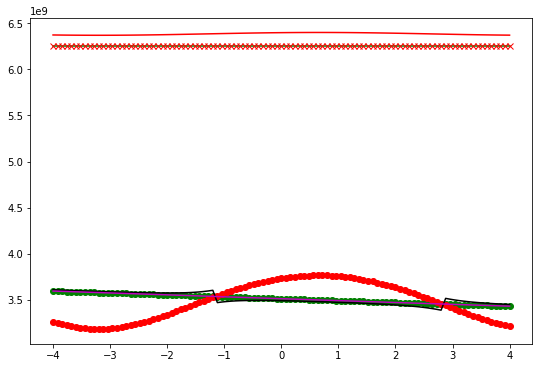

In [1123]:
L_mat = np.asarray([[-1.3e-01, 0.001, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0.01, -1.11824314e-01, 0.01, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0.01, -1.11824314e-01, 0.01, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0.01, -1.11824314e-01, 0.01, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0.01, -1.11824314e-01, 0.01, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0.01, -1.11824314e-01, 0.1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0.01, -1.11824314e-01, 0.01, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0.01, -1.11824314e-01, 0.01, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0.01, -1.11824314e-01, 0.01, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0.01, -1.11824314e-01, 0.01],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.01, -1.11824314e-01]])
Podgon_data=[]
Podgon_data.append([ 6.2580e+09, 0.8e-2, 1.126172185e+10 , 1.968976245e+09,
 15.6e7  ,7.96063944e-02 , -1.11824314e-01,  ])
Podgon_data.append([ 6.30402755e+09, 1.00433465e-01,1.10791479e+10,  1.81756150e+09,
  1.56453522e8 , 8.68666687e-02,  -1.12179379e-01,  ])

Podgon_data.append([6.36225166e+09, 8.01428025e-03,  11.1737426e+9  ,1.97694132e+09,
  1.54664926e8,   5.5e-03, -1.12493371e-01,  ])

P0=Podgon_data[0]
P1=Podgon_data[1]
P2=Podgon_data[2]
V0vec=np.asarray([0,-2, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x1=np.linspace(-4,4,101)
q0=0
q1=1
coil_id=0
Fq0,Fr0=Qubit_res(x1, coil_id, *P0[:], LVec=L_mat[q1], V0vec=V0vec,)
Fq1,Fr1=Qubit_res(x1, coil_id, *P1[:], LVec=L_mat[q0], V0vec=V0vec,)
plt.figure(figsize=(9,6))
plt.plot(x1,Fq0,'go')
plt.plot(x1,Fr0,'g')
plt.plot(x1,Fq1,'ro')
plt.plot(x1,Fr1,'r')
#print(Fq)

fq, FqR, fqb=Q_r_q(x=x1, qubit_id=1, coil_id=coil_id, pQ1=P0, CqL=0.02, pQl=P1, V0vec=V0vec, Lmat=L_mat)
plt.plot(x1,fq,'k')
plt.plot(x1,FqR,'rx')
plt.plot(x1,fqb,'m')
plt.show()

In [1014]:
all_qubits=['1','2','3','4','5','6','7','8','9','10','11']

VoltMatrix0=[]
F_data_mat=[]
V_data_mat=[]
for _id,qubit_id in enumerate(all_qubits):
    
    if qubit_id in ['1']:#,'3','5','7']:
        VoltRaw0=[]
        V_data_raw=[]
        F_data_raw=[]
        print(qubit_id)
        V0=np.zeros((len(all_qubits),))
        xd,yd,md=get_Adaptive_two_tone_spectroscopy(exdir_db_inst,all_qubits[_id])
        V0[_id]=0.0
        V0[_id+1]=float(md['voltR'])
        print(md['voltR'])
        VoltRaw0.append(V0)
        F_data_raw.append(yd)
        V_data_raw.append(xd)
        
        
        V0=np.zeros((len(all_qubits),))
        xn,yn,mn = get_Nondiag_two_tone_spectroscopy(exdir_db_inst, all_qubits[_id], all_qubits[_id+1])
        V0[_id+1]=float(mn['volt_coil'])
        VoltRaw0.append(V0)
        print(float(mn['volt_coil']))
        F_data_raw.append(yn/1e9)
        V_data_raw.append(xn)
       
        
    elif qubit_id in ['11']: #['2','4','6','10','11']:
        VoltRaw0=[]
        V_data_raw=[]
        F_data_raw=[]
        print(qubit_id)
        V0=np.zeros((len(all_qubits),))
        xn,yn,mn = get_Nondiag_two_tone_spectroscopy(exdir_db_inst, all_qubits[_id], all_qubits[_id-1])
        V0[_id]=float(mn['volt_coil'])
        print(float(mn['volt_coil']))
        VoltRaw0.append(V0)
        F_data_raw.append(yn/1e9)
        V_data_raw.append(xn)
        
        
        V0=np.zeros((len(all_qubits),))
        xd,yd,md=get_Adaptive_two_tone_spectroscopy(exdir_db_inst,all_qubits[_id])
        V0[_id-1]=float(md['voltL'])
        print(float(md['voltL']))
        VoltRaw0.append(V0)
        F_data_raw.append(yd)
        V_data_raw.append(xd)
        
    else:
        VoltRaw0=[]
        V_data_raw=[]
        F_data_raw=[]
        print(qubit_id)
        V0=np.zeros((len(all_qubits),))
        xn,yn,mn = get_Nondiag_two_tone_spectroscopy(exdir_db_inst, all_qubits[_id], all_qubits[_id-1])
        V0[_id]=float(mn['volt_coil'])
        VoltRaw0.append(V0)
        F_data_raw.append(yn/1e9)
        V_data_raw.append(xn)
        print(float(mn['volt_coil']))
        
        
        V0=np.zeros((len(all_qubits),))
        xd,yd,md=get_Adaptive_two_tone_spectroscopy(exdir_db_inst,all_qubits[_id])
        V0[_id-1]=float(md['voltL'])
        V0[_id+1]=float(md['voltR'])
        print(float(md['voltL']),float(md['voltL']))
        VoltRaw0.append(V0)
        F_data_raw.append(yd)
        V_data_raw.append(xd)
        
        V0=np.zeros((len(all_qubits),))
        xn,yn,mn = get_Nondiag_two_tone_spectroscopy(exdir_db_inst, all_qubits[_id], all_qubits[_id+1])
        V0[_id]=float(mn['volt_coil'])
        #print(V0)
        VoltRaw0.append(V0)
        F_data_raw.append(yn/1e9)
        V_data_raw.append(xn)
        print(float(mn['volt_coil']))
        #print(VoltRaw0)
    
    VoltMatrix0.append(VoltRaw0)
    F_data_mat.append(F_data_raw)
    V_data_mat.append(V_data_raw)

1
-1.018773074216412
-1.5150297137020452
2
-1.4597360862830562
-2.8694839977953457 -2.8694839977953457
-1.4597360862830562
3
-1.5150297137020452
-2.782625122482989 -2.782625122482989
-1.5150297137020452
4
-1.4449479970532069
-2.8694839977953457 -2.8694839977953457
-1.4449479970532069
5
-1.4148020614264991
-2.7703422189970963 -2.7703422189970963
-1.4148020614264991
6
-1.4680792355357695
-2.724018899086195 -2.724018899086195
-1.4680792355357695
7
-1.609427983378108
-2.8042536676562912 -2.8042536676562912
-1.609427983378108
8
-1.4822585177636165
-3.0402872741921603 -3.0402872741921603
-1.4822585177636165
9
-1.551852761288666
-2.795487264508976 -2.795487264508976
-1.551852761288666
10
-1.668817680018195
-2.9015611041625626 -2.9015611041625626
-1.668817680018195
11
-1.5
-3.0619935257818147


In [469]:
xn,yn,mn = get_Adaptive_two_tone_spectroscopy(exdir_db_inst,'11')
mn

{'resonator_id': '11',
 'probe_power': '-55.0',
 'base_pump_power': '-7.0',
 'bw': '10.0',
 'coilL': 'NNDAC-2',
 'fr_l': '[3.68515619]',
 'voltL': '-3.0619935257818147',
 'coilR': 'False',
 'fr_R': '0',
 'voltR': '0'}

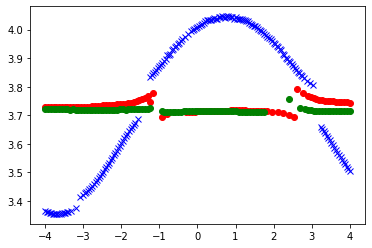

In [887]:
qubit_id=2

coil_id=1
plt.plot(np.asarray(V_data_mat[qubit_id][coil_id]),np.asarray(F_data_mat[qubit_id][coil_id]),'bx')
#xd,yd,md=get_Adaptive_two_tone_spectroscopy(exdir_db_inst,all_qubits[qubit_id])
#plt.plot(xd,yd)
xn,yn,mn = get_Nondiag_two_tone_spectroscopy(exdir_db_inst, all_qubits[qubit_id], all_qubits[qubit_id+1])
plt.plot(xn,yn/1e9,'ro')

xn,yn,mn = get_Nondiag_two_tone_spectroscopy(exdir_db_inst, all_qubits[qubit_id], all_qubits[qubit_id-1])
plt.plot(xn,yn/1e9,'go')



In [1124]:
#Initial Data
L_mat0 = np.asarray([[-1.3e-01, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0.01, -1.11824314e-01, 0.01, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0.01, -1.11824314e-01, 0.01, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0.01, -1.11824314e-01, 0.01, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0.01, -1.11824314e-01, 0.01, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0.01, -1.11824314e-01, 0.1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0.01, -1.11824314e-01, 0.01, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0.01, -1.11824314e-01, 0.01, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0.01, -1.11824314e-01, 0.01, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0.01, -1.11824314e-01, 0.01],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.01, -1.11824314e-01]])
phi0 = np.asarray([0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08])
for i in range (11):
    if i==0 or i==10:
        L_mat0[i,i]=P0_podgon[i][6]
        phi0[i]=P0_podgon[i][5]
        #print(L_mat0[i,i],phi0[i])
    else:
        
        L_mat0[i,i]=P0_podgon_twotone[i][6]
        phi0[i]=P0_podgon_twotone[i][5]
        #print(L_mat0[i,i],phi0[i])
#P0_podgon_twotone.append([ 6.30402755e+09, 1.00433465e-01,  1.10791479e+10,  1.81756150e+09,
  #1.56453522e8 , 8.68666687e-02,  3.49202273e+09,  1.33511318e-02,
  #3.81e+09,  3.67075470e-03 ,-1.12179379e-01])        
        
Fr0= np.asarray([P0_podgon[i][0] for i in range(11)])
Cr0= np.asarray([P0_podgon[i][1] for i in range(11)])
Ej10= np.asarray([P0_podgon[i][2] for i in range(11)])
Ej20= np.asarray([P0_podgon[i][3] for i in range(11)])
Ec0= np.asarray([P0_podgon[i][4] for i in range(11)])
#print(Fr0)

Cr=0.8e-2
CqqB=1.33e-2
CqqS=0.4e-2

coils=[]
for _id,qubit_id in enumerate(all_qubits):
    if qubit_id in ['1']:
        coil=[all_qubits[_id],all_qubits[_id+1]]
    elif qubit_id in ['11']:
        coil=[all_qubits[_id-1],all_qubits[_id]]
    else:
        coil=[all_qubits[_id-1],all_qubits[_id],all_qubits[_id+1]]
        
    coils.append(coil)

num_qubits = 11
Cap_mat0=np.diag(np.resize(Cr,num_qubits))+\
    np.diag(np.resize(np.array([CqqB,CqqS]),(num_qubits-1)),k=1)+\
    np.diag(np.resize(np.array([CqqB,CqqS]),(num_qubits-1)),k=-1)

P0data = {'Lmat':L_mat0,
                     'phi0':phi0,
                     'Fr0':Fr0,
                     'ECq':Ec0,
                     'EJ1':Ej10,
                     'EJ2':Ej20,
                     'Cmat':Cap_mat0}
          
                     #'Cr':Cr0,
                     #'Cqq1':Cqq1,
                     #'Cqq2':Cqq2,}

In [1125]:
P0_podgon

[[6260000000.0,
  5.75648278e-11,
  20408689200.0,
  3580604300.0,
  86130175.1,
  0.0822169602,
  -0.110745709],
 [6308786400.0,
  4.31268856e-19,
  19830899100.0,
  3208894430.0,
  83329893.9,
  0.08448316,
  -0.113388195],
 [6362300000.0,
  5.75648278e-11,
  20408689200.0,
  3580604300.0,
  86130175.1,
  0.0822169602,
  -0.110745709],
 [6412577290.0,
  1.12724259e-19,
  20110988300.0,
  3400898030.0,
  82826810.1,
  0.086469636,
  -0.113173875],
 [6458700000.0,
  1.62189135e-22,
  19657618100.0,
  3470257890.0,
  82918761.1,
  0.0879028568,
  -0.114572312],
 [6498400000.0,
  5.39803282e-30,
  19558064700.0,
  3131390520.0,
  82145815.6,
  0.0851922623,
  -0.112260792],
 [6555139340.0,
  5.86567097e-19,
  20079745500.0,
  3610775970.0,
  86611367.3,
  0.081280267,
  -0.104832111],
 [6597465320.0,
  1.10388734e-27,
  19891809800.0,
  3411371170.0,
  83845960.5,
  0.0806930318,
  -0.114222294],
 [6648131090.0,
  9.72855216e-31,
  19739359900.0,
  3632202030.0,
  87033263.0,
  0.0775346

In [925]:
P0data['Fr0'][:]

array([6.25800000e+09, 6.30402755e+09, 6.36225166e+09, 6.40841572e+09,
       6.45635702e+09, 6.51131535e+09, 6.55548153e+09, 6.59770969e+09,
       6.64811198e+09, 6.70352279e+09, 6.75304036e+09])

# Fit for individual qubits step by step

Initial data for all qubits

In [1130]:


def init_data(P0data, inf=False):
    num_qubits = 11
    initial_data=[]
    bounds=[]
    for _id,qubit_id in enumerate(all_qubits):
        if qubit_id=='1':
            p0 = (P0data['Fr0'][_id],
                      P0data['Cmat'][_id,_id],
                      P0data['EJ1'][_id], 
                      P0data['EJ2'][_id], 
                      P0data['ECq'][_id],
                      P0data['phi0'][_id],
                      0+1e-5,
                      P0data['Cmat'][_id,_id+1],)+tuple(P0data['Lmat'][_id,:]+1e-5)
            if inf==True:
                bound=((0,      0,      0,      0,      0,      -np.pi,0, 0)+tuple([-np.inf]*num_qubits),
                  (np.inf, np.inf, np.inf, np.inf, np.inf,  np.pi, np.inf, np.inf)+tuple([ np.inf]*num_qubits))
            else:
                bound=((p0[0]*0.9, p0[1]*0.1, p0[2]*0.1, p0[3]*0.1, p0[4]*0.1, p0[5]*0.1, p0[6], p0[7]*0.1,)+\
                       tuple(-2*np.abs(P0data['Lmat'][_id,:])),\
                  (1.5*p0[0], 5*p0[1], 5*p0[2], 5*p0[3], 5*p0[4], 5*p0[5], p0[6]+1e-5, 2*p0[7])+\
                       tuple(2*np.abs(P0data['Lmat'][_id,:])+1e-5))
        elif qubit_id=='11':
            p0 = (P0data['Fr0'][_id],
                      P0data['Cmat'][_id,_id],
                      P0data['EJ1'][_id], 
                      P0data['EJ2'][_id], 
                      P0data['ECq'][_id],
                      P0data['phi0'][_id],
                      P0data['Cmat'][_id,_id-1],
                      0+1e-5,)+tuple(P0data['Lmat'][_id,:]+1e-5) 
            if inf==True:
                bound=((0,      0,      0,      0,      0,      -np.pi, 0, 0)+tuple([-np.inf]*num_qubits),
                  (np.inf, np.inf, np.inf, np.inf, np.inf,  np.pi, np.inf, np.inf)+tuple([ np.inf]*num_qubits))
            else:
                bound=((p0[0]*0.9, p0[1]*0.1, p0[2]*0.1, p0[3]*0.1, p0[4]*0.1, p0[5]*0.1, p0[6]*0.1, p0[7]*0.1)+\
                       tuple(-2*np.abs(P0data['Lmat'][_id,:])),\
                  (1.5*p0[0], 5*p0[1], 5*p0[2], 5*p0[3], 5*p0[4], 5*p0[5], 5*p0[6], p0[7]+1e-5)+\
                       tuple(2*np.abs(P0data['Lmat'][_id,:])+1e-5))
        else:
            p0 = (P0data['Fr0'][_id],
                      P0data['Cmat'][_id,_id],
                      P0data['EJ1'][_id], 
                      P0data['EJ2'][_id], 
                      P0data['ECq'][_id],
                      P0data['phi0'][_id],
                      P0data['Cmat'][_id,_id-1],
                      P0data['Cmat'][_id,_id+1],)+tuple(P0data['Lmat'][_id,:]+1e-5)
            if inf==True:
                bound=((0,      0,      0,      0,      0,      -np.pi, 0, 0)+tuple([-np.inf]*num_qubits),
                  (np.inf, np.inf, np.inf, np.inf, np.inf,  np.pi, np.inf, np.inf)+tuple([ np.inf]*num_qubits))
            else:
                bound=((p0[0]*0.9, p0[1]*0.1, p0[2]*0.1, p0[3]*0.1, p0[4]*0.1, p0[5]*0.1, p0[6]*0.1, p0[7]*0.1)+\
                       tuple(-2*np.abs(P0data['Lmat'][_id,:])),\
                  (1.5*p0[0], 5*p0[1], 5*p0[2], 5*p0[3], 5*p0[4], 5*p0[5], 5*p0[6], 5*p0[7])+\
                       tuple(2*np.abs(P0data['Lmat'][_id,:])+1e-5))
                
        
        initial_data.append(p0)
        bounds.append(bound)
    return initial_data, bounds

In [1134]:
from copy import copy
num_qubits = 11
L_ind_mat=[]
phi0_vec = []
fitresults_vec = []

initial_data,bounds=init_data(P0data,inf=False)

for _id, qubit_id in enumerate(all_qubits):
    V_coils=coils[_id]
    L=L_mat0[_id,_id]
    V0=VoltMatrix0[_id].copy()
    data = F_data_mat[_id].copy()
    x = V_data_mat[_id].copy()
    
    def residuals(p):
        Lvec = p[8:]
        pQ1 = p[:6]+(Lvec[_id],)
        CqR=p[7]
        CqL=p[6]
        if qubit_id=='1':
            pQr = initial_data[_id+1][:6]+(initial_data[_id+1][8:][_id+1],)
            pQl=False
        elif qubit_id=='11':
            pQr=False
            pQl = initial_data[_id-1][:6]+(initial_data[_id-1][8:][_id-1],)
        else:
            pQr = initial_data[_id+1][:6]+(initial_data[_id+1][8:][_id+1],)
            pQl = initial_data[_id-1][:6]+(initial_data[_id-1][8:][_id-1],)
        
        res = []
        Lmat=L_mat0
        Lmat[_id,:]=Lvec
        for _cd,coil in enumerate(coils[_id]):
            coil_id=all_qubits.index(coil)
            vec=Q_r_q(x=x[_cd], qubit_id=_id, coil_id=coil_id, pQ1=pQ1, CqR=CqR, pQr=pQr, CqL=CqL, pQl=pQl,V0vec=V0[_cd],Lmat=Lmat)
            res.extend(vec[0]/1e9-np.asarray(data[_cd])*(3 if coil == qubit_id else 1))
        return res
              
    from scipy.optimize import least_squares
    p0 = initial_data[_id]
    bound = bounds[_id]
    
    fitresults = least_squares(residuals, p0, x_scale=np.abs(p0), bounds=bound)
    fitresults_vec.append(fitresults.x[:])
    phi0_vec.append(fitresults.x[5])
    L_ind_mat.append(fitresults.x[8:])
    print (fitresults.x)

[ 5.63400000e+09  7.77016875e-03  1.38880030e+10  1.38851787e+10
  4.30644193e+08  1.42377484e-01  1.99500000e-05  1.50660222e-03
 -4.24613660e-03  8.00699236e-02  2.99999000e-05  2.99999000e-05
  2.99999000e-05  2.99999000e-05  2.99999000e-05  2.99999000e-05
  2.99999000e-05  2.99999000e-05  2.99999000e-05]
[5.67972041e+09 3.12162435e-02 2.03203369e+09 6.73774904e+08
 9.74437813e+06 8.68665475e-02 1.32999952e-02 4.00000000e-03
 4.55775211e-02 3.49202310e+09 4.34730846e-02 2.99999000e-05
 2.99999000e-05 2.99999000e-05 2.99999000e-05 2.99999000e-05
 2.99999000e-05 2.99999000e-05 2.99999000e-05]
[ 5.75430782e+09  8.18063827e-03  3.06234402e+09  3.61415964e+08
  1.18968958e+07  8.27517503e-02  3.99999978e-03  1.33000000e-02
  2.99999000e-05  9.24229876e-04  3.74499993e+09 -1.92516476e-03
  2.99999000e-05  2.99999000e-05  2.99999000e-05  2.99999000e-05
  2.99999000e-05  2.99999000e-05  2.99849988e-05]
[ 5.85190816e+09  7.43991338e-03  4.77029176e+09  1.19254299e+09
  1.69690218e+07  7.5608

In [1141]:
qubit_id=0
fitresults_vec[qubit_id], initial_data[qubit_id]

(array([ 5.63400000e+09,  7.77016875e-03,  1.38880030e+10,  1.38851787e+10,
         4.30644193e+08,  1.42377484e-01,  1.99500000e-05,  1.50660222e-03,
        -4.24613660e-03,  8.00699236e-02,  2.99999000e-05,  2.99999000e-05,
         2.99999000e-05,  2.99999000e-05,  2.99999000e-05,  2.99999000e-05,
         2.99999000e-05,  2.99999000e-05,  2.99999000e-05]),
 (6260000000.0,
  0.008,
  20408689200.0,
  3580604300.0,
  86130175.1,
  0.0822169602,
  1e-05,
  0.0133,
  -0.005192812691414573,
  0.04003996179612993,
  2.9999900000000004e-05,
  2.9999900000000004e-05,
  2.9999900000000004e-05,
  2.9999900000000004e-05,
  2.9999900000000004e-05,
  2.9999900000000004e-05,
  2.9999900000000004e-05,
  2.9999900000000004e-05,
  2.9999900000000004e-05))

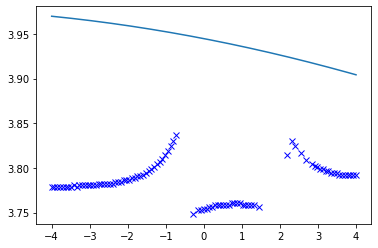

In [1144]:
qubit_id=0
c_id=1
coil=coils[qubit_id][c_id]
p=tuple(fitresults_vec[qubit_id])[:]
p=initial_data[qubit_id]
Lvec = p[8:]
V0=VoltMatrix0[qubit_id].copy()
pQ1 = p[:6]+(Lvec[qubit_id],)
CqR=p[7]
CqL=p[6]
if qubit_id==0:
    pQr = tuple(fitresults_vec[qubit_id+1])[:6]+(tuple(fitresults_vec[qubit_id+1])[8:][qubit_id+1],)
    pQl=False
elif qubit_id==10:
    pQr=False
    pQl = tuple(fitresults_vec[qubit_id-1])[:6]+(tuple(fitresults_vec[qubit_id-1])[8:][qubit_id-1],)
else:
    pQr = tuple(fitresults_vec[qubit_id+1])[:6]+(tuple(fitresults_vec[qubit_id+1])[8:][qubit_id+1],)
    pQl = tuple(fitresults_vec[qubit_id-1])[:6]+(tuple(fitresults_vec[qubit_id-1])[8:][qubit_id-1],)

plt.plot(np.asarray(V_data_mat[qubit_id][c_id]),np.asarray(F_data_mat[qubit_id][c_id]),'bx')

x=np.linspace(-4.0,4.0,201)

y=Q_r_q(x=x, qubit_id=qubit_id, coil_id=all_qubits.index(coil), pQ1=pQ1, CqR=CqR, pQr=pQr, CqL=CqL, pQl=pQl,V0vec=V0[c_id],Lmat=Lmat)
            
plt.plot(x,y[0]/1e9)



In [1135]:
coil_id

0

In [1100]:
coil=coils[qubit_id][c_id]
coil


'3'

In [1037]:
pQ1

6222287974.644922

In [867]:
pQr

array([6.30402755e+09, 1.04181349e-01, 2.08297593e+10, 3.41776798e+09,
       2.94146196e+08, 2.57825923e-01])

In [864]:
pQr = tuple(fitresults_vec[qubit_id+1])[:6]+tuple(fitresults_vec[qubit_id+1])[8:][qubit_id+1]
pQr1 = initial_data[qubit_id+1][:6]+(initial_data[qubit_id+1][8:][qubit_id+1],)

pQr, tuple(pQr), pQr1, pQr1

(array([6.30402755e+09, 1.04181349e-01, 2.08297593e+10, 3.41776798e+09,
        2.94146196e+08, 2.57825923e-01]),
 (6304027550.0939245,
  0.1041813487547673,
  20829759320.991753,
  3417767981.1814713,
  294146195.954946,
  0.2578259228877016),
 (6304027550.0,
  0.008,
  11079147900.0,
  1817561500.0,
  156453522.0,
  0.0868666687,
  -0.05702913354725766),
 (6304027550.0,
  0.008,
  11079147900.0,
  1817561500.0,
  156453522.0,
  0.0868666687,
  -0.05702913354725766))

In [854]:
a=False
if a.any()!=False:
    print(a)


AttributeError: 'bool' object has no attribute 'any'

In [603]:
for i in range(20):
    print(bound[0][i],bound[1][i])

3129000000.0 12516000000.0
0.004 0.016
5630860925.0 22523443700.0
984488122.5 3937952490.0
78000000.0 312000000.0
0.0796063944 0.0796063944
0 1e-05
0.00665 0.0266
-0.223648628 0.223658628
-0.02 0.02001
-0.0 1e-05
-0.0 1e-05
-0.0 1e-05
-0.0 1e-05
-0.0 1e-05
-0.0 1e-05
-0.0 1e-05
-0.0 1e-05
-0.0 1e-05


IndexError: tuple index out of range

In [560]:
p0

(6258000000.0,
 0.008,
 11261721850.0,
 1968976245.0,
 156000000.0,
 0.0796063944,
 None,
 0.0133,
 -0.111824314,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0)

In [570]:
V0vec

array([ 0.        , -1.01877307,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [663]:
from copy import copy
_id=0
x = np.asarray(V_data_mat[_id].copy())
V0vec=np.asarray(VoltMatrix0[_id].copy())
p=initial_data[_id]
Lvec = p[8:]
pQ1 = p[:6]+(Lvec[_id],)

pQr = initial_data[_id+1][:6]+(initial_data[_id+1][8:][_id+1],)
pQl = initial_data[_id+1][:6]+(initial_data[_id-1][8:][_id-1],)
CqR=p[7]
CqL=p[8]
res = []
Lmat=L_mat0
Lmat[_id,:]=Lvec
coil_id=0
vec=Q_r_q(np.asarray(x[0]), qubit_id=_id, coil_id=coil_id, pQ1=pQ1, CqR=CqR, pQr=pQr, CqL=None, pQl=None,V0vec=V0vec,Lmat=Lmat)
vec[0]


array([3.24741400e+09, 3.24554217e+09, 3.24540667e+09, 3.24580573e+09,
       3.24673826e+09, 3.24820174e+09, 3.25019225e+09, 3.25270446e+09,
       3.25573170e+09, 3.25926598e+09, 3.26329806e+09, 3.26781749e+09,
       3.27281268e+09, 3.27827098e+09, 3.28417875e+09, 3.29052142e+09,
       3.29728359e+09, 3.30444910e+09, 3.31200113e+09, 3.31992223e+09,
       3.32819449e+09, 3.33679953e+09, 3.34571861e+09, 3.35493273e+09,
       3.36442266e+09, 3.37416901e+09, 3.38415232e+09, 3.39435310e+09,
       3.40475185e+09, 3.41532917e+09, 3.42606574e+09, 3.43694240e+09,
       3.44794015e+09, 3.45904020e+09, 3.47022396e+09, 3.48147310e+09,
       3.50409529e+09, 3.52676482e+09, 3.58274561e+09, 3.60450963e+09,
       3.62571552e+09, 3.64622801e+09, 3.66590668e+09, 3.67538730e+09,
       3.68460298e+09, 3.69353352e+09, 3.70215801e+09, 3.71045497e+09,
       3.71840251e+09, 3.72597879e+09, 3.73316249e+09, 3.73993366e+09,
       3.74627467e+09, 3.75217139e+09, 3.75761434e+09, 3.76259981e+09,
      

In [524]:
tuple([-np.inf]*11)

(-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf)

In [725]:
from qsweepy.fitters import multiqubit_spectra
import importlib
importlib.reload(multiqubit_spectra)
from qsweepy.fitters.multiqubit_spectra import *

In [726]:

x,y, m =get_Adaptive_two_tone_spectroscopy(exdir_db_inst, '1')
float(m['voltL'])

0.0

In [729]:
x,y,m = get_Nondiag_two_tone_spectroscopy(exdir_db_inst, '2', '3')
float(m['volt_coil'])
y

array([3.64750931e+09, 3.64750931e+09, 3.64750931e+09, 3.64750931e+09,
       3.64750931e+09, 3.64750931e+09, 3.64750931e+09, 3.64750931e+09,
       3.64750931e+09, 3.64750931e+09, 3.64750931e+09, 3.64750931e+09,
       3.64750931e+09, 3.64750931e+09, 3.64750931e+09, 3.64750931e+09,
       3.64950931e+09, 3.64950931e+09, 3.64950931e+09, 3.64950931e+09,
       3.64950931e+09, 3.64950931e+09, 3.64950931e+09, 3.64950931e+09,
       3.64950931e+09, 3.65150931e+09, 3.65150931e+09, 3.65350931e+09,
       3.65550931e+09, 3.64350931e+09, 3.64350931e+09, 3.64350931e+09,
       3.64550931e+09, 3.64550931e+09, 3.64550931e+09, 3.64550931e+09,
       3.64550931e+09, 3.64550931e+09, 3.64550931e+09, 3.64550931e+09,
       3.64750931e+09, 3.64550931e+09, 3.64550931e+09, 3.64750931e+09,
       3.64750931e+09, 3.64750931e+09, 3.64750931e+09, 3.64750931e+09,
       3.64750931e+09, 3.64750931e+09, 3.64750931e+09, 3.64750931e+09,
       3.64750931e+09, 3.64750931e+09, 3.64750931e+09, 3.64750931e+09,
      

In [81]:
spectra

NameError: name 'spectra' is not defined

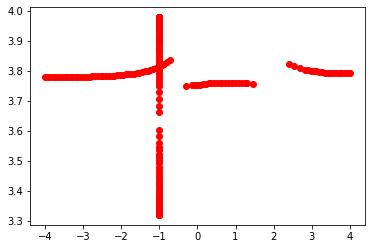

In [168]:
plt.figure()
plt.plot(np.asarray(X)[:111,1],np.asarray(y),'ro')

In [92]:
np.asarray(X)

NameError: name 'X' is not defined

In [94]:
x,y,m=get_Adaptive_two_tone_spectroscopy(exdir_db_inst,'1')
x

array([-3.9 , -3.8 , -3.75, -3.7 , -3.65, -3.6 , -3.55, -3.5 , -3.45,
       -3.4 , -3.35, -3.3 , -3.25, -3.2 , -3.15, -3.1 , -3.05, -3.  ,
       -2.95, -2.9 , -2.85, -2.8 , -2.75, -2.7 , -2.65, -2.6 , -2.55,
       -2.5 , -2.45, -2.4 , -2.35, -2.3 , -2.25, -2.2 , -2.15, -2.1 ,
       -2.  , -1.9 , -1.65, -1.55, -1.45, -1.35, -1.25, -1.2 , -1.15,
       -1.1 , -1.05, -1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 ,
       -0.65, -0.6 , -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25,
       -0.15, -0.1 ,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ])

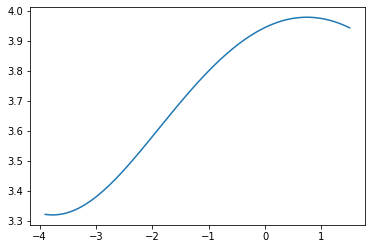

In [155]:
plt.plot(x,y)